In [1]:
import pandas as pd
import json
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
import numpy as np

In [2]:
f1 = '/home/upload/ray_results/rl_const_sparsity_obs_space_5x5_1f1c1k_obs_env_kc_5x5_1f1c1k_obs_with_lagrange_dual_sparsity/main_fcn_b3e5a_00000_0_2021-10-14_22-11-38/result.json'
f2 = '/home/upload/ray_results/rl_const_sparsity_obs_space_5x5_1f1c1k_obs_env_kc_5x5_1f1c1k_obs_with_lagrange_dual_sparsity/main_fcn_910b7_00000_0_2021-10-15_22-52-25/result.json'
fs = [f1, f2]

In [3]:
def load_csv(f1):
    data = open(f1, 'r').readlines()
    data = [json.loads(x) for x in tqdm(data)]
    df = pd.DataFrame(data)
    df = df[~pd.isna(df['epochs'])]
    return df

In [4]:
dfs = [load_csv(f) for f in fs]

  0%|          | 0/17325 [00:00<?, ?it/s]

  0%|          | 0/25899 [00:00<?, ?it/s]

In [5]:
df = pd.concat(dfs)

In [6]:
list(df.columns)

['epochs',
 'n_samples',
 'losses/opt1d/primal/coeff',
 'losses/opt1d/primal/value',
 'losses/opt1d/value',
 'losses/opt2/dual/coeff',
 'losses/opt2/dual/value',
 'losses/opt2/value',
 'grads/opt1d/grad_total_l1mean',
 'grads/opt1d/grad_total_l2sum',
 'grads/opt2/grad_total_l1mean',
 'grads/opt2/grad_total_l2sum',
 'metrics/batch_index',
 'metrics/batch_size',
 'metrics/primal/fit/value',
 'metrics/primal/fit/coeff',
 'metrics/primal/fit/mean_feature',
 'metrics/primal/fit/std_feature',
 'metrics/primal/fit/min_feature',
 'metrics/primal/fit/max_feature',
 'metrics/primal/fit/loss_fcons',
 'metrics/primal/fit/loss_add',
 'metrics/primal/fit/loss_rec',
 'metrics/primal/fit/loss_fcons_pre',
 'metrics/primal/fit/rec_fit_acc_loss_01_agg',
 'metrics/primal/fit/loss_discrete',
 'metrics/primal/fit/loss_orig',
 'metrics/primal/fit/additional/value',
 'metrics/primal/fit/obs/value',
 'metrics/primal/fit/feat/value',
 'metrics/primal/fit/feat_model/value',
 'metrics/primal/fit/additional_orig/v

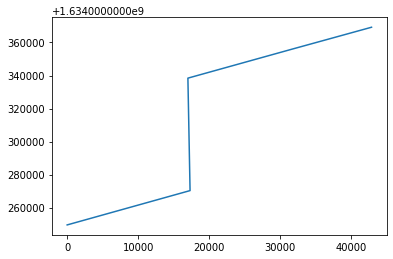

In [7]:
plt.plot(df.epochs, df.timestamp)

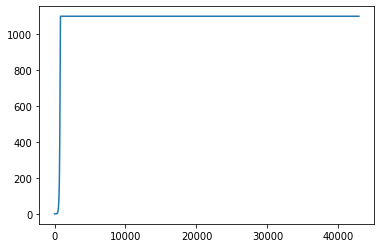

In [8]:
plt.plot(df.epochs, df['metrics/dual/lagrange_multiplier/fit/feat'])

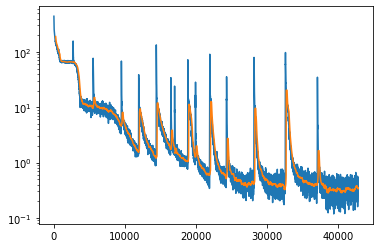

In [9]:
data = df['metrics/primal/fit_all_on/loss_rec']
smoothed = data.rolling(50).median()
plt.plot(df.epochs, data)
plt.plot(df.epochs, smoothed)

plt.yscale('log')

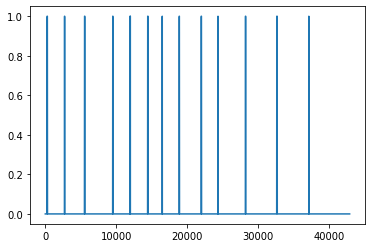

In [51]:
ys = np.abs(data - smoothed) > 30
plt.plot(df.epochs, ys)

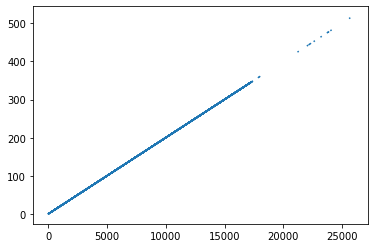

In [16]:
plt.plot(df['metrics/context_stats_steps_sampled_laps'])

In [56]:
ys_where = np.where(ys)[0]
ys_where

array([  49,   50,   51,   52,   53,   54,   55,   56,   57,   58,  540,
        541,  542,  543,  544,  545, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       2388, 2390, 2396, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891,
       2892, 2893, 2894, 3297, 3838, 3839, 3840, 3841, 3842, 3843, 3844,
       4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4932, 4933,
       5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 6588, 6589, 6590,
       6591, 6592, 6593, 6594, 6595, 6596, 6597, 6598, 6599, 6600, 6602,
       7493])

In [65]:
def filter_closeness(x_inp, min_diff=5):
    output = []
    
    block_start = None
    block_last = None
    output = []
    
    for item in x_inp:
        if block_start is None or np.abs(item - block_last) >= min_diff:
            # resetting block beginning
            block_start = item
            block_last = item
            
            if block_start:
                output.append(block_start)
            
        block_last = item
        
    return output

In [73]:
ys_close = filter_closeness(ys_where)
ys_close_epochs = [df.epochs.iloc[x] for x in ys_close]

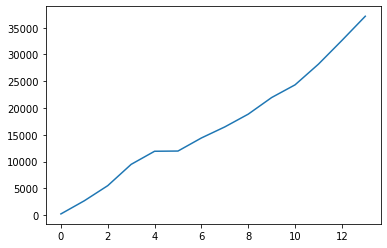

In [74]:
plt.plot(ys_close_epochs)

In [76]:
np.max(ys_close_epochs) / (len(ys_close_epochs) - 1)

2856.923076923077

In [ ]:
# hypothesis: data collection has issues...


In [34]:
np.mean(df.epochs == sorted(df.epochs))

1.0

In [10]:
df = df.sort_values('epochs')

In [ ]:
df